# Vika 8

Dagsetning: 5. apríl

## Sýnidæmi úr bók bls. 253

Olíunotkun á heimsvísu milli 1980 og 2013.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gögn lesin úr skrá
data = np.genfromtxt('oliunotkun.csv', skip_header=True, delimiter='\t')
x = data[:,0] - 1980
y = data[:,1]/1000 # Milljónir tunna

# Finna líkan á forminu f(t)=θ1 + θ2*x
m = x.shape[0]
A = np.c_[np.ones(m), x]
theta,res,rank,_ = np.linalg.lstsq(A, y, rcond=False)

# Teikna gögn ásamt bestu línu
plt.scatter(x + 1980, y)
yp = np.dot(np.c_[np.ones(m), x], theta) # Reiknum spágildi fyrir punktana í x
plt.plot(x + 1980, yp, 'r-')
plt.xlabel('Ár')
plt.ylabel('Olíunotkun (milljónir tunna á dag)')
plt.title('Olínotkun í heiminum á árunum 1980 - 2013')
plt.show()

# Drögum línuna frá gögnunum til að sjá sveiflur betur
plt.plot(x + 1980, y - yp, 'bo-')
plt.xlabel('Ár')
plt.ylabel('Olíunotkun (milljónir tunna á dag)')
plt.title('Olínotkun eftir að línuleg leitni hefur verið fjarlægð')
plt.show()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 0: ordinal not in range(128)

## Aðhvarfsgreining með margliðum

Notum tilbúin gögn að þessu sinni. Við þekkjum því undirliggjandi fallið $f$ og við ætlum að sjá hversu vel okkur gengur að nálga það í framhaldinu. Gildin á $x$ eru slembin og $y_i=0.5 x_i^4 - 0.4x_i^3 - 4x_i^2 + x_i + 2 + \epsilon_i$ þar sem $\epsilon_i$ er (normaldreift) "suð". 

In [5]:
def tilbuin_gogn(N):
    # Tilbúið gagnasafn
    x = np.random.uniform(-3,3,N)
    y = 0.5*x**4 -0.4*x**3 - 4*x**2+x + 2 + np.random.normal(0.0,0.5,N) # 4. stigs margliða
    return x,y

 
-1.195 x - 1.811


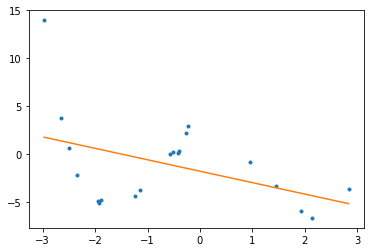

        2
0.2073 x - 1.125 x - 2.412


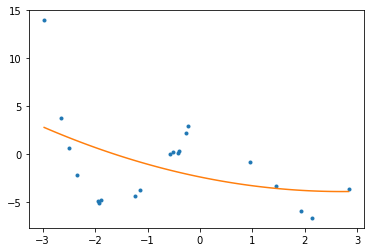

        4          3         2
0.4989 x - 0.4627 x - 3.916 x + 1.478 x + 1.968


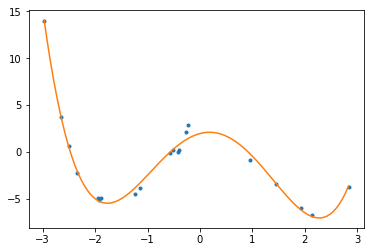

          8            7          6           5         4          3
0.009418 x + 0.003251 x - 0.1669 x - 0.03585 x + 1.436 x - 0.3793 x
          2
 - 5.649 x + 1.5 x + 2.432


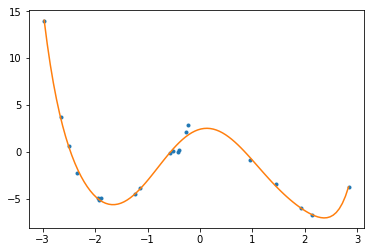

          16          15          14         13         12         11
-0.02448 x  - 0.2135 x  - 0.2463 x  + 2.916 x  + 9.512 x  - 5.777 x 
          10         9         8         7         6         5
 - 65.27 x  - 64.37 x + 139.8 x + 320.7 x + 50.83 x - 430.9 x
          4         3         2
 - 411.5 x + 39.64 x + 240.3 x + 124.1 x + 20.3


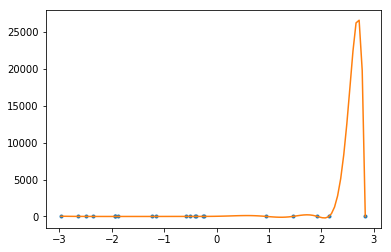

In [6]:
N=20
x,y = tilbuin_gogn(N)

for k in [1,2,4,8,16]:
    pz = np.polyfit(x,y,k) # finnum k-ta stigs margliðu
    p = np.poly1d(pz) # Klasi sem einfaldar umstang með margliður
    xp = np.linspace(min(x),max(x),100)
    plt.plot(x,y,'.',xp,p(xp),'-') # plottum gögn vs margliðu
    print(p)
    plt.show()

Þegar gráða margliðu hækkar þá lækkar ferviksskekkja en það merkir ekki endilega að líkanið spái réttilega fyrir um óséð gögn, þ.e. gögn sem voru ekki notuð til að meta stika líkansins. Setjum til hliðar hluta gagna ("prófunargögn"), t.d. 20% og notum RMS skekkju á þau gögn sem mælikvarða á gæði líkans.

In [7]:
# Setja 
ntrain=int(0.2*N)
x1 = x[:-ntrain] # Þjálfunargögn
y1 = y[:-ntrain]
x2 = x[-ntrain:] # Prófunargögn
y2 = y[-ntrain:]
print(x1)

def rms(u):
    return np.linalg.norm(u)/np.sqrt(len(u))

[ 2.14250854 -1.87912227  1.44876447 -0.51614303 -1.23055558 -1.14967093
 -0.26523881 -2.35378931 -0.39982281  1.92355895 -1.93397844 -2.97181901
 -2.49451645 -0.23537474 -2.64875948 -1.94317099]


In [9]:
test_rms = []
train_rms = []
for k in range(15):
    pz = np.polyfit(x1,y1,k) # finnum k-ta stigs margliðu
    p = np.poly1d(pz)
    train_rms.append(rms(y1 - p(x1))) # RMS skekkja þjálfunargagna
    test_rms.append(rms(y2 - p(x2))) # RMS skekkja prófunargagna
print(test_rms)


[1.5203780788766814, 2.3801914504783164, 2.4508218296596356, 15.284765607832247, 0.77514801379675835, 2.8329152526759791, 9.6858176899769006, 4.1862386185968097, 50.442930002845699, 79.661628321534181, 1178.622466900779, 17036.477245160208, 24556.320230668716, 86426.276370737571, 544672.04503380565]


In [ ]:
train_rms

In [ ]:
test_rms

In [ ]:
plt.plot(range(len(test_rms)), train_rms,'-',color='blue',label='þjálfunargögn')
plt.plot(range(len(train_rms)), np.clip(test_rms,0,4),'-',color='red', label='prófunargögn')
plt.legend()
plt.show()

Af grafinu sést að margliða með gráðu á bilinu 4 til 8 gefur lægsta spáskekkju (getur breyst lítillega ef kóðinn er keyrður aftur því gögn eru slembin).

## Cross-validation bls. 264-266

Sýnidæmi úr bók um aðhvarfsgreiningarlíkan fyrir húsnæðisverð (sjá líka bls. 39). Spálíkanið er $\hat{y} = x^T \beta + v = \beta_1 x_1 + \beta_2 x_2 + v$.

<img src="vika8regression.png" width="400" height="400" />

## Minnstu kvaðrata flokkari

Sýnidæmi bls. 289 - 290 (Iris gagnasafnið)

<img src="vika8iris.png" width="400" height="400" />

In [11]:
data=np.genfromtxt('iris.csv',skip_header=True)

X=data[:,0:3] # Sepal (bikarblað) length, Sepal width, Petal (krónublað) length, Petal Width
y=data[:,-1] # Flokkar Setosa=1, Versicolor=2, Virginica=3

# Breyta í 2ja flokka verkefni, Virginica eða ekki
y[y==3]=-1
y[y==2]=1

N = X.shape[0]
A = np.c_[np.ones(N), X]
theta,res,rank,_ = np.linalg.lstsq(A, y, rcond=False)
print("theta:", theta) # Ekki sömu gildi og í bók

# Spá
ypred=np.sign(np.dot(A,theta))

print(np.sum(y != ypred)/N)

('theta:', array([ 2.64276905,  0.31804135, -0.64653815, -0.58353933]))
0


# Flokkun á handskrifuðum stöfum (MNIST gagnasafnið) bls. 302 - 304

<img src="vika8mnist.png" width="600" height="600" />

U.þ.b. 14% skekkja á prófunar- og þjálfunargögn þ.a. nákvæmni á óséð gögn er líklega svipuð.

Skekkja í flokkun hjá mönnum er u.þ.b. 2%.

Bestu flokkarar ná minna en 1% skekkju!